In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

print(f"Torch: version {torch.__version__}")
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
!nvidia-smi

Torch: version 2.7.1
zsh:1: command not found: nvidia-smi


In [2]:
# Classification
# For example to chose if something is spam or not
# Simple is a binary classification

# Or a Multiple Classificaiton with mode then one class
# You can also have multilable classification
# You have more then one class for a decision

# Use imagenet for data

# For example images has an input
# W = 224
# H = 224
# C = 3 RGB

# Output
# [0.97, 0.00, 0.3] probabilitis for classification 

# This will be turned into labels

# Input:
# [batch_size, colour_channels, width, height]
# Shape = [None, 3, 224, 224]
# Shape = [32, 3, 224, 224]
# Batch size is the number of images to look at at each time



In [3]:
# Achitecture of a classificationmodel
# Binary o Multi

In [4]:
## NN Classification
# Data load
import sklearn
from sklearn.datasets import make_circles

In [5]:
SAMPLES = 1000

X, y = make_circles(SAMPLES, noise=0.03, random_state=432)

len(X), len(y)

(1000, 1000)

In [6]:
# lets see the data
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[-1.00533917  0.2288058 ]
 [ 0.19402606  0.76576227]
 [-0.86011599 -0.4523498 ]
 [-0.04224535 -0.78293253]
 [ 0.82201522  0.61509043]]
y: [0 1 0 1 0]


In [7]:
# A you can see this is a binary classification

import pandas as pd
circles = pd.DataFrame({
    "X1" : X[:, 0],
    "X2" : X[:, 1],
    "label" : ("Circle" if l else "Not Circle" for l in y),
    "Y" : y
})

In [8]:
circles.head(10)

,X1,X2,label,Y
0,-1.005339,0.228806,Not Circle,0
1,0.194026,0.765762,Circle,1
2,-0.860116,-0.452350,Not Circle,0
3,-0.042245,-0.782933,Circle,1
4,0.822015,0.615090,Not Circle,0
5,0.042340,-0.820545,Circle,1
6,0.788799,0.618500,Not Circle,0
7,0.772605,0.075514,Circle,1
8,-0.773899,-0.661456,Not Circle,0
9,-0.305820,-0.902537,Not Circle,0


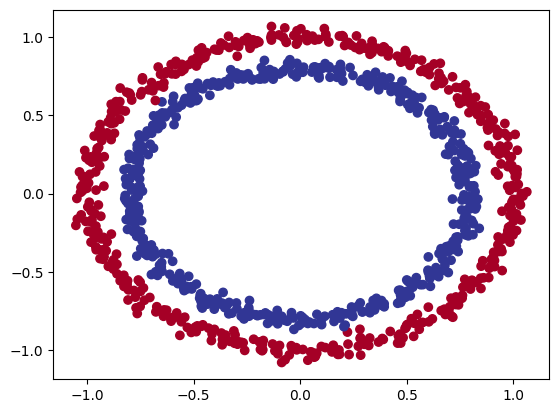

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c = y, cmap=plt.cm.RdYlBu)

In [10]:
# Waht we want to do is to classify the data
# This is a toy dataset


In [11]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# We need torch tensors
# View the firt example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"The sample X is {X_sample}, and the shape {X_sample.shape}")
print(f"The sample y is {y_sample}, and the shape {y_sample.shape}")

The sample X is [-1.00533917  0.2288058 ], and the shape (2,)
The sample y is 0, and the shape ()


In [13]:
import torch
# Turn data into tensors
X_t = torch.from_numpy(X).type(torch.float)
y_t = torch.from_numpy(y).type(torch.float) # this must be float

print(f"The X is {X_t}, and the shape {X_t.shape}")
print(f"The y is {y_t}, and the shape {y_t.shape}")

The X is tensor([[-1.0053,  0.2288],
        [ 0.1940,  0.7658],
        [-0.8601, -0.4523],
        ...,
        [ 0.9905, -0.0991],
        [-0.1437,  0.7913],
        [-0.0659,  0.9693]]), and the shape torch.Size([1000, 2])
The y is tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.,

In [14]:
# Training and test splits
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.33, random_state=432)
X_train, X_test, y_train, y_test

(tensor([[ 0.5654,  0.7800],
         [ 0.7569,  0.2490],
         [-1.0014,  0.0333],
         ...,
         [-0.4034, -0.7381],
         [ 0.6753, -0.3552],
         [ 0.6064, -0.5277]]),
 tensor([[-9.0063e-01,  4.5735e-01],
         [-1.0232e+00,  1.5680e-02],
         [-1.1891e-01, -1.0047e+00],
         [ 9.2733e-01, -3.2765e-01],
         [-5.1514e-01,  5.7834e-01],
         [ 8.1221e-01, -1.9222e-01],
         [ 6.4927e-01, -5.3071e-01],
         [ 7.8104e-01,  2.6881e-01],
         [-2.0789e-01, -7.7402e-01],
         [ 6.9367e-02,  8.0836e-01],
         [-7.5832e-01, -1.2416e-01],
         [ 1.0329e+00, -7.2810e-02],
         [ 7.0664e-02, -1.0401e+00],
         [-5.1263e-01, -5.9510e-01],
         [-5.5716e-01, -5.5281e-01],
         [ 9.4239e-01, -3.5318e-01],
         [ 6.3121e-01,  4.8130e-01],
         [-7.2531e-02,  1.0574e+00],
         [-1.3488e-01,  1.0114e+00],
         [ 1.0146e+00, -2.3678e-01],
         [ 6.0120e-01, -5.0258e-01],
         [-6.8939e-01,  4.2806e-0

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(670, 330, 670, 330)

In [16]:
import torch
import torch.nn as nn

class CircleClassifierV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(2, 5) # in is 2 because the shape of X is (.., 2)
                                  # out is 5 because we chose this
        self.l2 = nn.Linear(5, 1) # in is 5 because of the out of the first layer
                                  # out is 1 becase y has 1 feature
    
    def forward(self, x : torch.tensor):
        return self.l2(self.l1(x))

circClass = CircleClassifierV0()


In [17]:
# We can do this with nn.Sequential
circClassV2 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1),
)

In [18]:
circClassV2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# Make some predictions
circClassV2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5122, -0.3190],
                      [ 0.3429, -0.5557],
                      [ 0.0075,  0.4776],
                      [-0.4979, -0.4847],
                      [ 0.3880,  0.0557]])),
             ('0.bias', tensor([-0.0457, -0.3133, -0.3606, -0.2025, -0.3361])),
             ('1.weight',
              tensor([[ 0.0061, -0.4433,  0.2725, -0.0993,  0.3486]])),
             ('1.bias', tensor([0.1765]))])

In [20]:
with torch.inference_mode():
    untr_preds = circClass(X_test)

print(f"Predictions Not Trained: {untr_preds[:5]} vs real{y_test[:5]}")
# As you can see we need to activation 


Predictions Not Trained: tensor([[-0.1977],
        [-0.3112],
        [-0.3487],
        [-0.0124],
        [-0.1000]]) vs realtensor([0., 0., 0., 0., 1.])


In [21]:
import torch.optim as optim
import numpy as np

# Training
# Loss for classification
loss_fn = nn.BCEWithLogitsLoss() # This is also the output activation function; so is combining Sigmoid -> BCELoss 
# and is more numerically stable

optimizer = optim.SGD(
    params=circClass.parameters(),
    lr = 0.03
)

# Calculate accuracy - out of 100 what percent the model gets right
def accuracy_fn(y_test, preds):
    correct = (y_test == preds).type(torch.float)
    nc = (torch.count_nonzero(correct))
    return  nc.item() / len(y_test) * 100

# acc = accuracy_fn(torch.tensor([0, 1, 1, 1, 0]), torch.tensor([0, 0, 1, 0, 0]))
# acc

# Training
torch.manual_seed(42)

epochs = 1000
for ep in range(epochs):
    circClass.train()

    # Logits
    y_logits = circClass(X_train).squeeze()
    # Using sigmoid activation and rounding
    y_pred = torch.round(torch.sigmoid(y_logits))
    # loss and accuracy
    loss = loss_fn(y_logits, # we expect raw logits
                   y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    optimizer.step()

    circClass.eval()
    with torch.inference_mode():
        test_logits = circClass(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(test_pred, y_test)

    if ep % (epochs / 10) == 0:
        print(f"Ep: {ep} | loss: {loss:.5f} | tloss: {test_loss:.5f} | acc: {acc:.2f}% | test_acc: {test_acc:.2f}%")


Ep: 0 | loss: 0.70018 | tloss: 0.69678 | acc: 47.76% | test_acc: 47.58%
Ep: 100 | loss: 0.69521 | tloss: 0.69366 | acc: 50.75% | test_acc: 48.18%
Ep: 200 | loss: 0.69400 | tloss: 0.69317 | acc: 50.60% | test_acc: 51.21%
Ep: 300 | loss: 0.69349 | tloss: 0.69307 | acc: 50.45% | test_acc: 50.61%
Ep: 400 | loss: 0.69326 | tloss: 0.69311 | acc: 50.90% | test_acc: 54.55%
Ep: 500 | loss: 0.69315 | tloss: 0.69319 | acc: 50.30% | test_acc: 49.39%
Ep: 600 | loss: 0.69311 | tloss: 0.69327 | acc: 50.30% | test_acc: 49.39%
Ep: 700 | loss: 0.69308 | tloss: 0.69334 | acc: 55.97% | test_acc: 54.55%
Ep: 800 | loss: 0.69307 | tloss: 0.69339 | acc: 52.99% | test_acc: 52.12%
Ep: 900 | loss: 0.69306 | tloss: 0.69343 | acc: 52.39% | test_acc: 52.42%


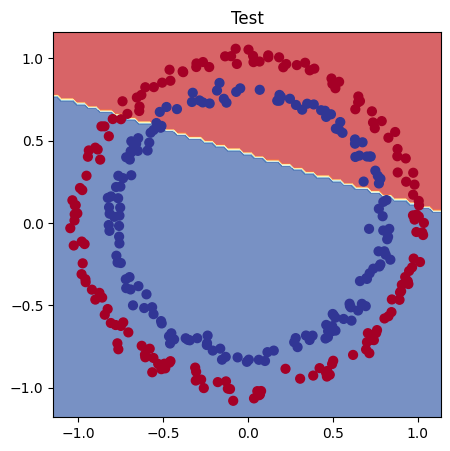

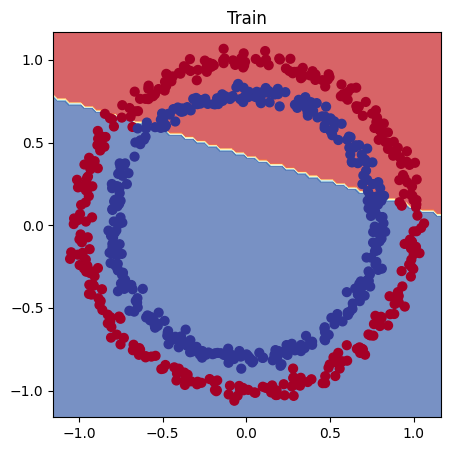

In [22]:
# The model is not good !
# Lets visualize
from helper_functions import *
plt.figure(figsize=(5, 5))
plt.subplot()
plt.title("Test")
plot_decision_boundary(circClass, X_test, y_test)
plt.figure(figsize=(5, 5))
plt.subplot()
plt.title("Train")
plot_decision_boundary(circClass, X_train, y_train)

Ep: 0 | loss: 0.69477 | tloss: 0.69379 | acc: 46.27% | test_acc: 46.97%
Ep: 500 | loss: 0.68689 | tloss: 0.68832 | acc: 52.09% | test_acc: 53.33%
Ep: 1000 | loss: 0.67991 | tloss: 0.68297 | acc: 55.22% | test_acc: 53.94%
Ep: 1500 | loss: 0.66730 | tloss: 0.67331 | acc: 61.94% | test_acc: 60.61%
Ep: 2000 | loss: 0.64471 | tloss: 0.65532 | acc: 66.12% | test_acc: 62.12%
Ep: 2500 | loss: 0.58614 | tloss: 0.59769 | acc: 82.24% | test_acc: 76.97%
Ep: 3000 | loss: 0.44090 | tloss: 0.44645 | acc: 93.58% | test_acc: 93.33%
Ep: 3500 | loss: 0.24824 | tloss: 0.25024 | acc: 97.91% | test_acc: 99.09%
Ep: 4000 | loss: 0.12604 | tloss: 0.13001 | acc: 99.55% | test_acc: 99.09%
Ep: 4500 | loss: 0.07371 | tloss: 0.07788 | acc: 99.55% | test_acc: 100.00%


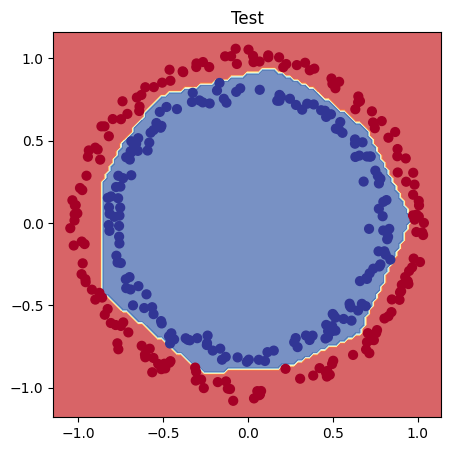

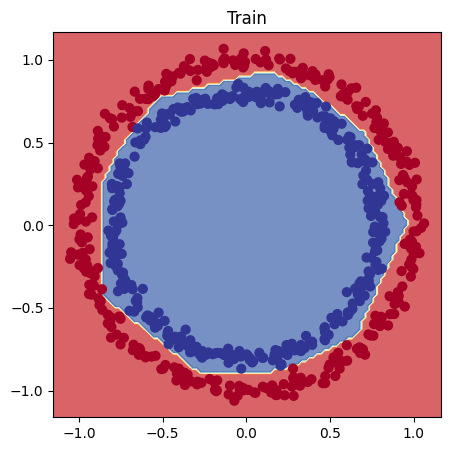

In [23]:
# Model with non linearity
circClassV2 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.Linear(8, 1),
)

import torch.optim as optim
import numpy as np

# Training
# Loss for classification
loss_fn = nn.BCEWithLogitsLoss() # This is also the output activation function; so is combining Sigmoid -> BCELoss 
# and is more numerically stable

optimizer = optim.SGD(
    params=circClassV2.parameters(),
    lr = 0.03
)

# Calculate accuracy - out of 100 what percent the model gets right
def accuracy_fn(y_test, preds):
    correct = (y_test == preds).type(torch.float)
    nc = (torch.count_nonzero(correct))
    return  nc.item() / len(y_test) * 100

# Training
torch.manual_seed(42)
epochs = 5000
for ep in range(epochs):
    circClass.train()

    # Logits
    y_logits = circClassV2(X_train).squeeze()
    # Using sigmoid activation and rounding
    y_pred = torch.round(torch.sigmoid(y_logits))
    # loss and accuracy
    loss = loss_fn(y_logits, # we expect raw logits
                   y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    optimizer.step()

    circClassV2.eval()
    with torch.inference_mode():
        test_logits = circClassV2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(test_pred, y_test)

    if ep % (epochs / 10) == 0:
        print(f"Ep: {ep} | loss: {loss:.5f} | tloss: {test_loss:.5f} | acc: {acc:.2f}% | test_acc: {test_acc:.2f}%")

# Lets visualize
from helper_functions import *
plt.figure(figsize=(5, 5))
plt.subplot()
plt.title("Test")
plot_decision_boundary(circClassV2, X_test, y_test)
plt.figure(figsize=(5, 5))
plt.subplot()
plt.title("Train")
plot_decision_boundary(circClassV2, X_train, y_train)

In [24]:
# In this case this works because we are using NON-Linear funciont ReLU activation function

In [25]:
circClassV2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 1.0622,  0.8645],
                      [-0.3823,  1.8525],
                      [-0.1549,  0.1427],
                      [-2.2622,  0.4873],
                      [ 0.5971, -2.4456],
                      [ 1.7703,  1.4618],
                      [ 1.3798, -0.1852],
                      [ 0.5816,  0.6148]])),
             ('0.bias',
              tensor([ 0.3935, -0.7625, -0.3301, -0.1573, -0.5305, -0.1974, -0.3819,  1.8082])),
             ('2.weight',
              tensor([[-0.6743, -0.9969, -0.0998, -1.0571, -0.9289, -1.1913, -0.2958,  0.4705],
                      [ 0.6939,  0.8667, -0.1148,  1.0315,  0.9479,  1.0875,  0.6260, -0.8698],
                      [ 0.4112,  0.5325,  0.1488,  0.9505,  0.9157,  0.4782,  0.6658, -0.5242],
                      [ 0.3883,  0.2747, -0.3500,  0.3619,  0.3118,  0.7874,  0.4652, -0.2991],
                      [ 0.1390,  0.1119,  0.2767, -0.1286,  0.1844, -0.1148,  0.2012, -0.2214],
        

In [26]:
circClassV2

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Linear(in_features=8, out_features=1, bias=True)
)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
        68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 7

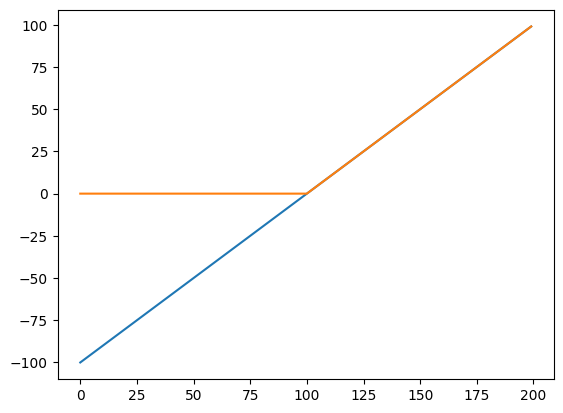

In [ ]:
# Relu Test

import torch.nn as nn
import torch 

m = nn.ReLU()

inp= torch.arange(-100, 100, 1.0)
#print(inp)
plt.plot(inp)

out = m(inp)
print(out)
plt.plot(out)

# the blue part in the plot is the input data
# The orange part is the output of the activation function applied to the input data

In [45]:
def myrelu(x: torch.tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)

In [46]:
def mysigmoid(x: torch.tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

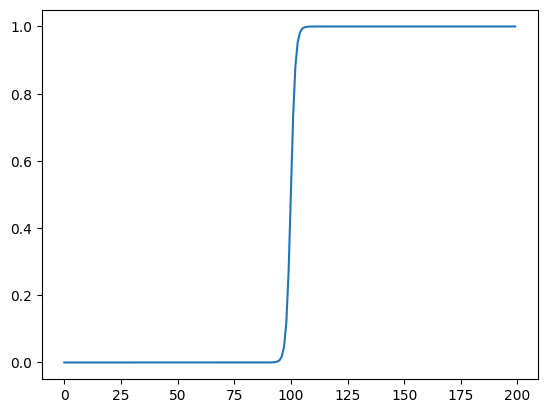

In [47]:
plt.plot(torch.sigmoid(inp))

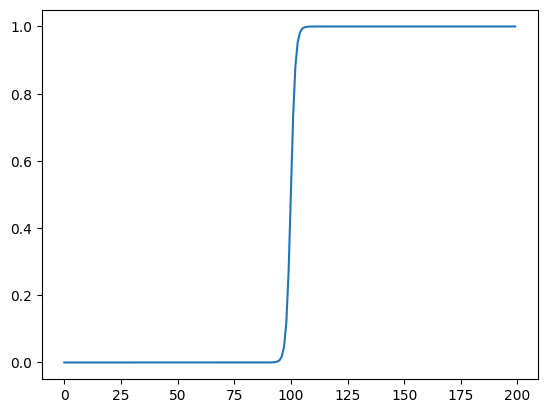

In [48]:

plt.plot(mysigmoid(inp))